# Introducing Seaborn

### Introducing Seaborn!

- Also based on matplotlib
- Better base aesthetics (arguably)
- Good for automatic aggregation/summarization for plotting
- Can do a multitude of regressions
- Now for the introduction...

See documentation: <https://seaborn.pydata.org/tutorial.html>

### Goals:

- Figure- vs. Axis-level plots
- Distribution plots
- Relational plots
- Categorical plots
- Plus `pairplot()` and `jointplot()`


**General classification scheme for basic plotting in seaborn:**

<img src="sns_figure_classes.png" alt="Seaborn plotting scheme" style="width:500px;"/>

Top categories are **Figure-level**, subcategories are **Axis-level**

Let's do some examples...

In [3]:
#First load the library:
import seaborn as sns

#Plus other standard libraries
#####

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd


In [4]:
#NOTE: Use this to avoid having to use plt.show() a bunch
%matplotlib inline

Seaborn also has some simple datasets built in:


In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Let's just check out `penguins` to demonstrate the capabilities of seaborn.

In [6]:
penguins = sns.load_dataset("penguins")

In [7]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### Let's start with visualizing the *distributions*

Note: Options for `multiple`:
- "layer"
- "dodge"
- "stack"
- "fill"        

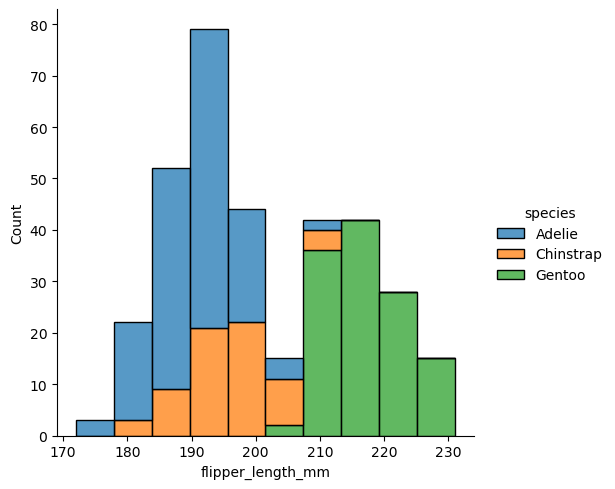

In [13]:
#Can use EITHER:
#Figure-level function:

sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")#, kind='kde')

#This displot calls histplot under the hood, but is a figure-level function

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

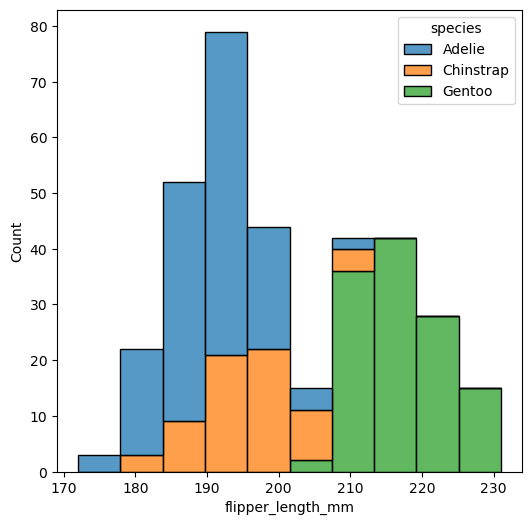

In [14]:
#OR, use histplot directly:
fig, ax1 = plt.subplots(1,1, figsize=(6, 6))

sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", ax=ax1)

#histplot drops into the axis in which its drawing, can therefore be easily mixed with other matplotlib stuff...

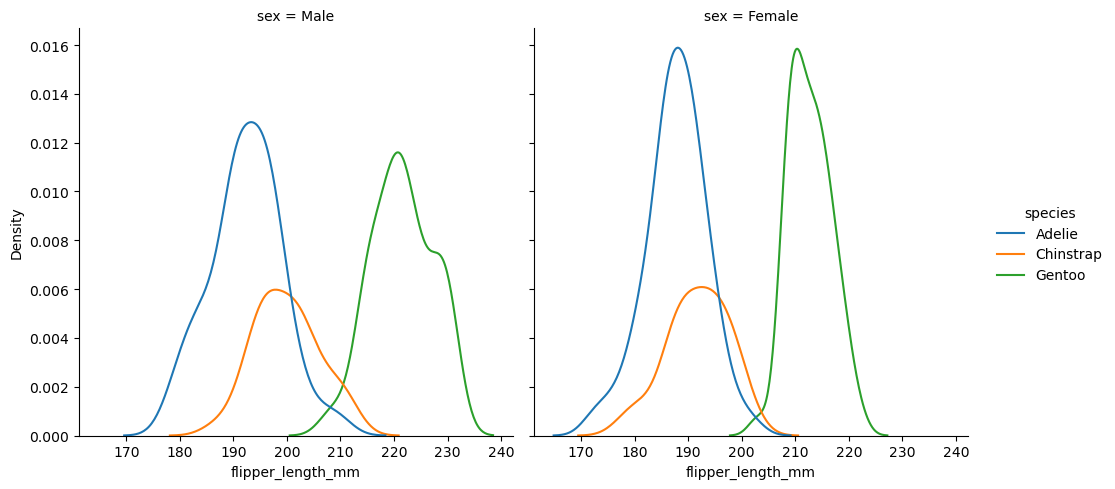

In [15]:
#FIGURE-level functions allow easy faceting, etc., while axis-level are more "direct"
#Use col, for column argument:

sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="sex", kind='kde')

#### Seaborn theme and styles

Note the plots above use matplotlib defaults. If we want to use seaborn defaults, use the following (note that previously, seaborn would automatically switch you to its defaults, which was sometimes annoying...): 

In [20]:
sns.set_theme()

#### To reset back to matplotlib defaults:

In [18]:
sns.reset_orig()

#Need this again as well, to avoid having to explicitly call plt.show()
%matplotlib inline

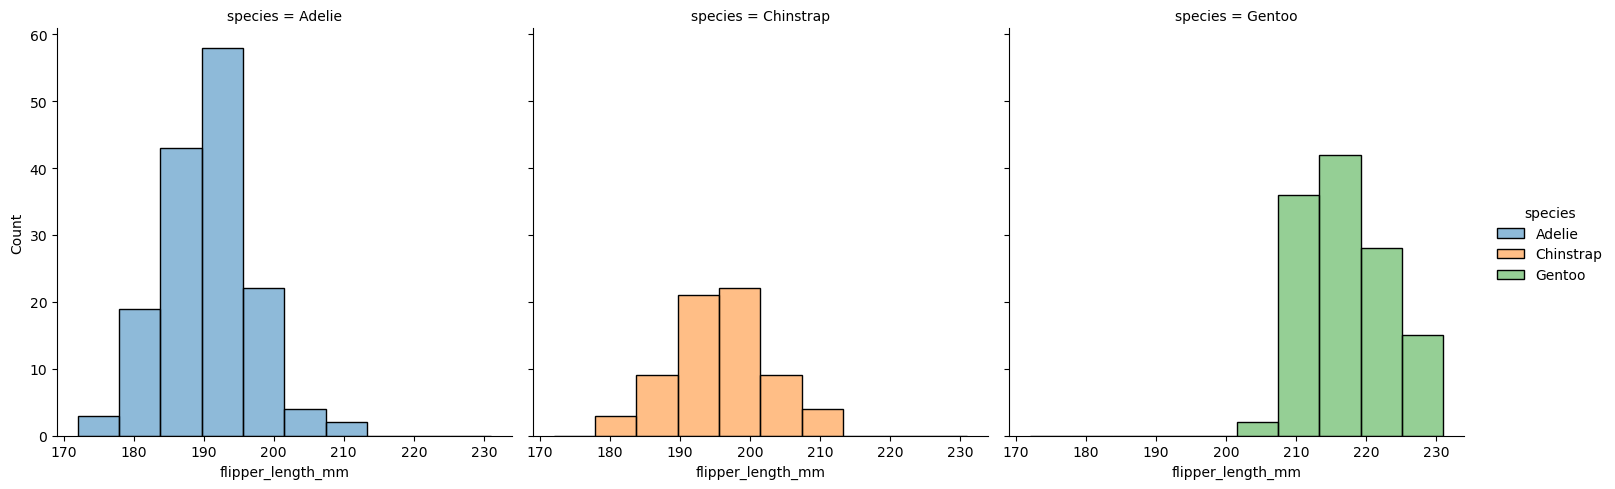

In [19]:
#Using seaborn theme, now we get:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

#### Set figure style:

Five seaborn themes:

- `darkgrid`
- `whitegrid`
- `dark`
- `white`
- `ticks`

Use `sns.set_style("<>")`:

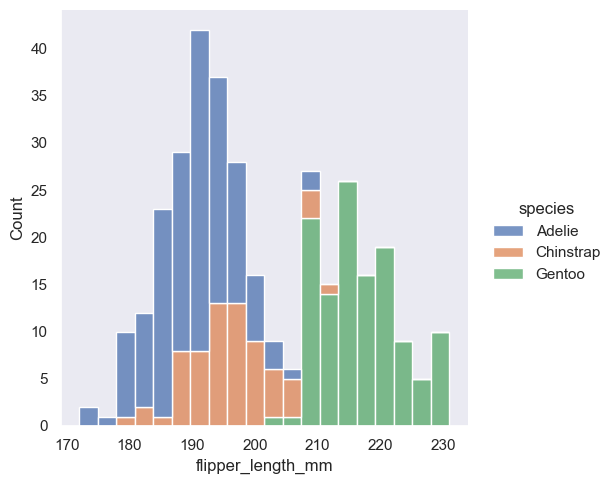

In [25]:
#Try the different styles:
sns.set_style("dark")

sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", bins=20)

#### Other distribution plots

- `kde` - kernel density estimate
- `ecdf` - empirical cumulative distribution function

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

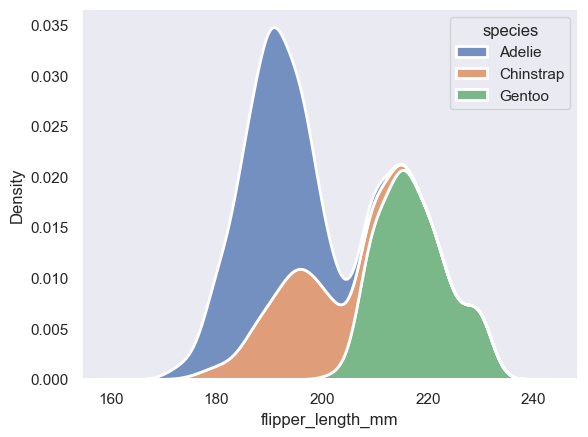

In [27]:
#kde plot:
#EITHER:
#sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple='stack', kind='kde')

#OR:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple='stack', linewidth=2)

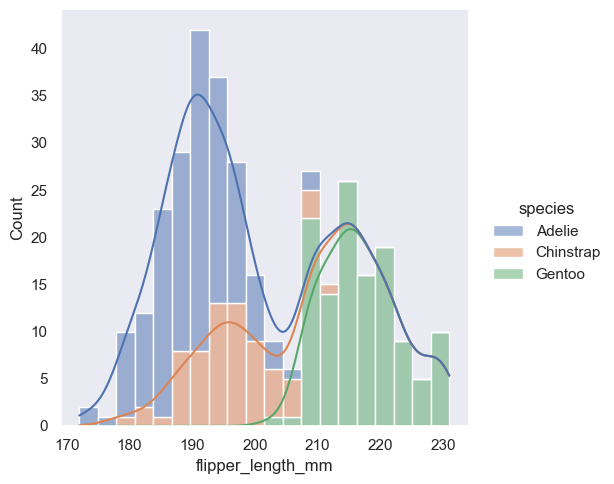

In [28]:
#Note: Can add the kde to the histplot!
####:

sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", bins=20, kde=True)

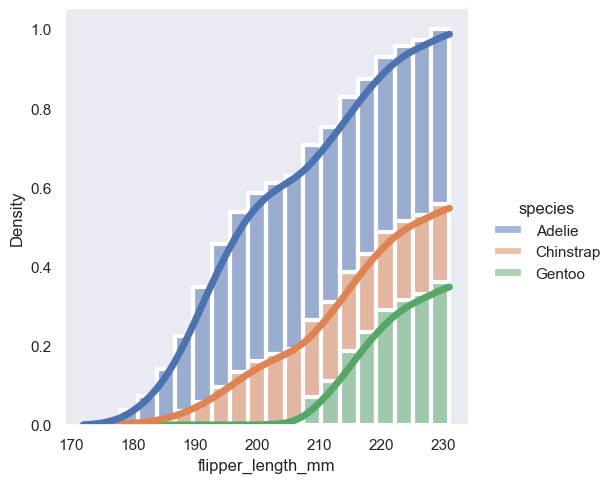

In [29]:
#And can do as *cumulative*
#Add in stat='density' and some other aesthetic modifications

sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", bins=20, linewidth=3,
            kde=True, line_kws = {'linewidth': 5}, cumulative=True, stat='density')


Note different stats:

 - `count`
 - `frequency`
 - `probability`
 - `percent`
 - `density`



<AxesSubplot: xlabel='body_mass_g', ylabel='Count'>

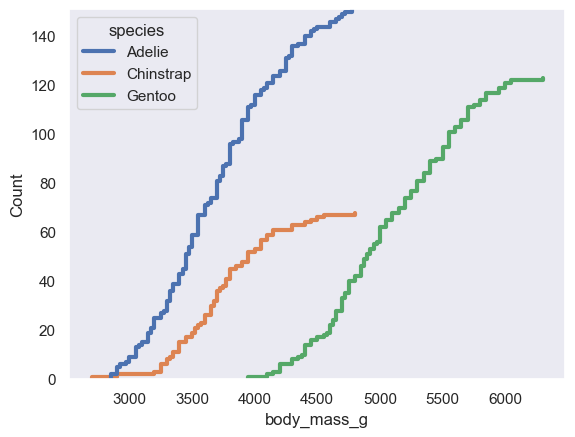

In [31]:
#ecdf Plot:
#Again, EITHER:
#Can throw in a rug plot with rug=True:
#sns.displot(data=penguins, x="body_mass_g", hue="species", kind='ecdf', stat="count", linewidth=3, rug=True)

#OR:
sns.ecdfplot(data=penguins, x="body_mass_g", hue="species", stat="count", linewidth=3)

#### Note: Axis-level rugplot:

<AxesSubplot: xlabel='body_mass_g'>

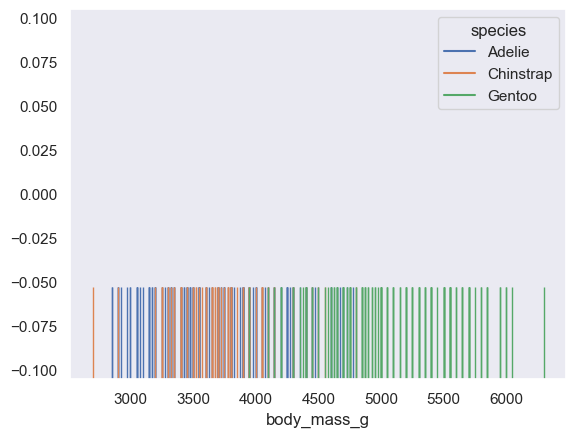

In [34]:
sns.rugplot(data=penguins, x="body_mass_g", hue="species", linewidth=1, height=.25)

### Now, relational plots (mainly scatter plots)

- `relplot`:
    - `scatterplot`
    - `lineplot`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

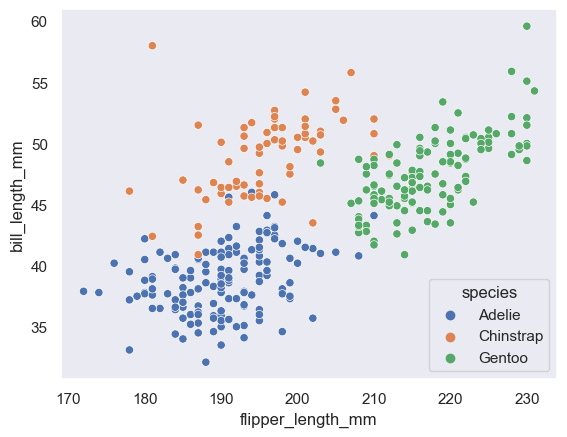

In [36]:
#For a scatter plot
#Again, EITHER:
#sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

#OR:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

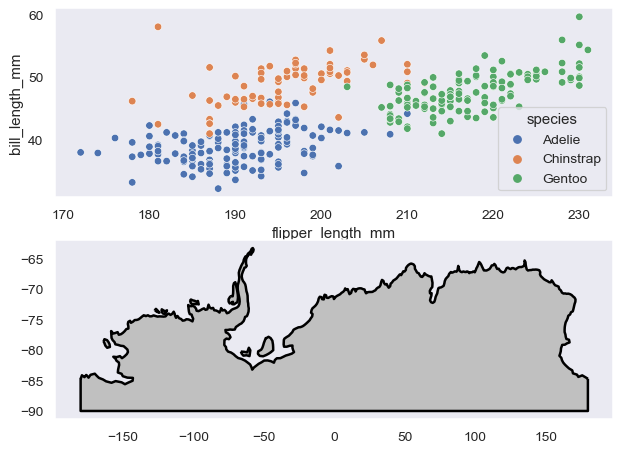

In [37]:
#Advantage of scatterplot is we can easily use with our own axis object, other matplotlib stuff:
############

#Let's reset to matplotlib defaults
#sns.reset_orig()

fig, ax1 = plt.subplots(2,1, figsize=(8, 6), dpi=90)

#A Scatter plot here:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue='species', ax=ax1[0])


#Plot Antarctica in the other subplot
#Get Natural Earth
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Get Antarctica
antarctica = world.loc[world.continent == 'Antarctica']

antarctica.plot(ax = ax1[1], linewidth=2, edgecolor='black', facecolor='silver', )


#And set back to seaborn theme:
sns.set_theme()

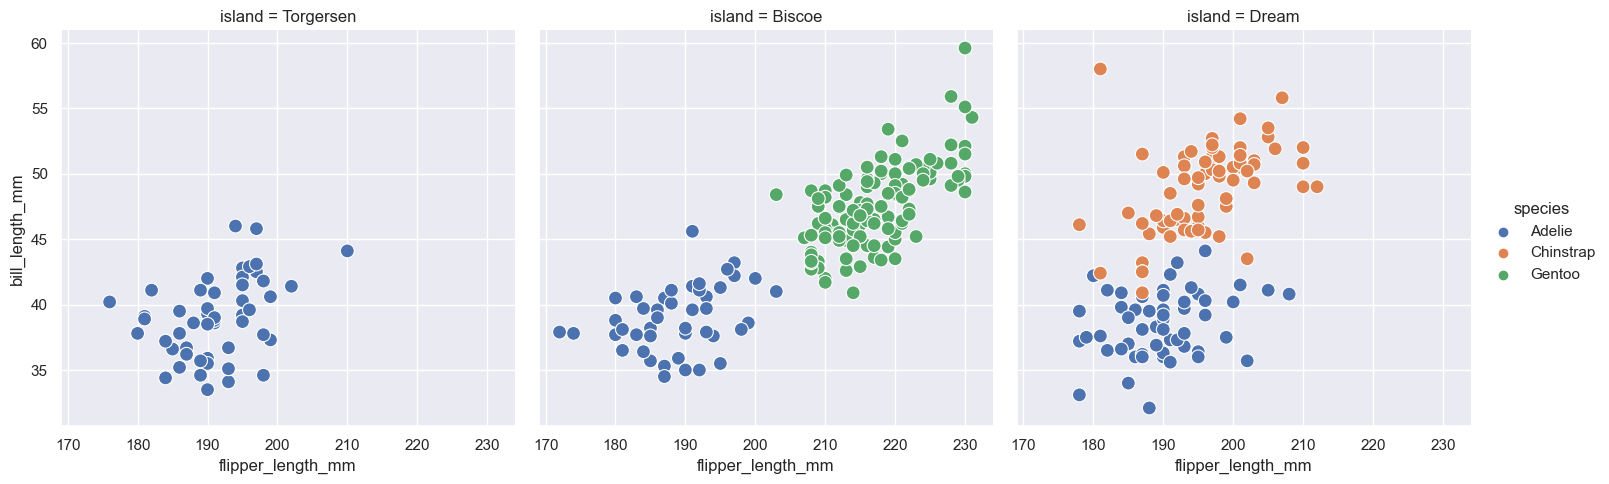

In [40]:
#Again, advantage of relplot is that seaborn creates its own figure and can do fancy stuff
#Returns a matplotlib axis object
#Can facet by island, for example:
s = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", col="island", s=100)

In [41]:
s

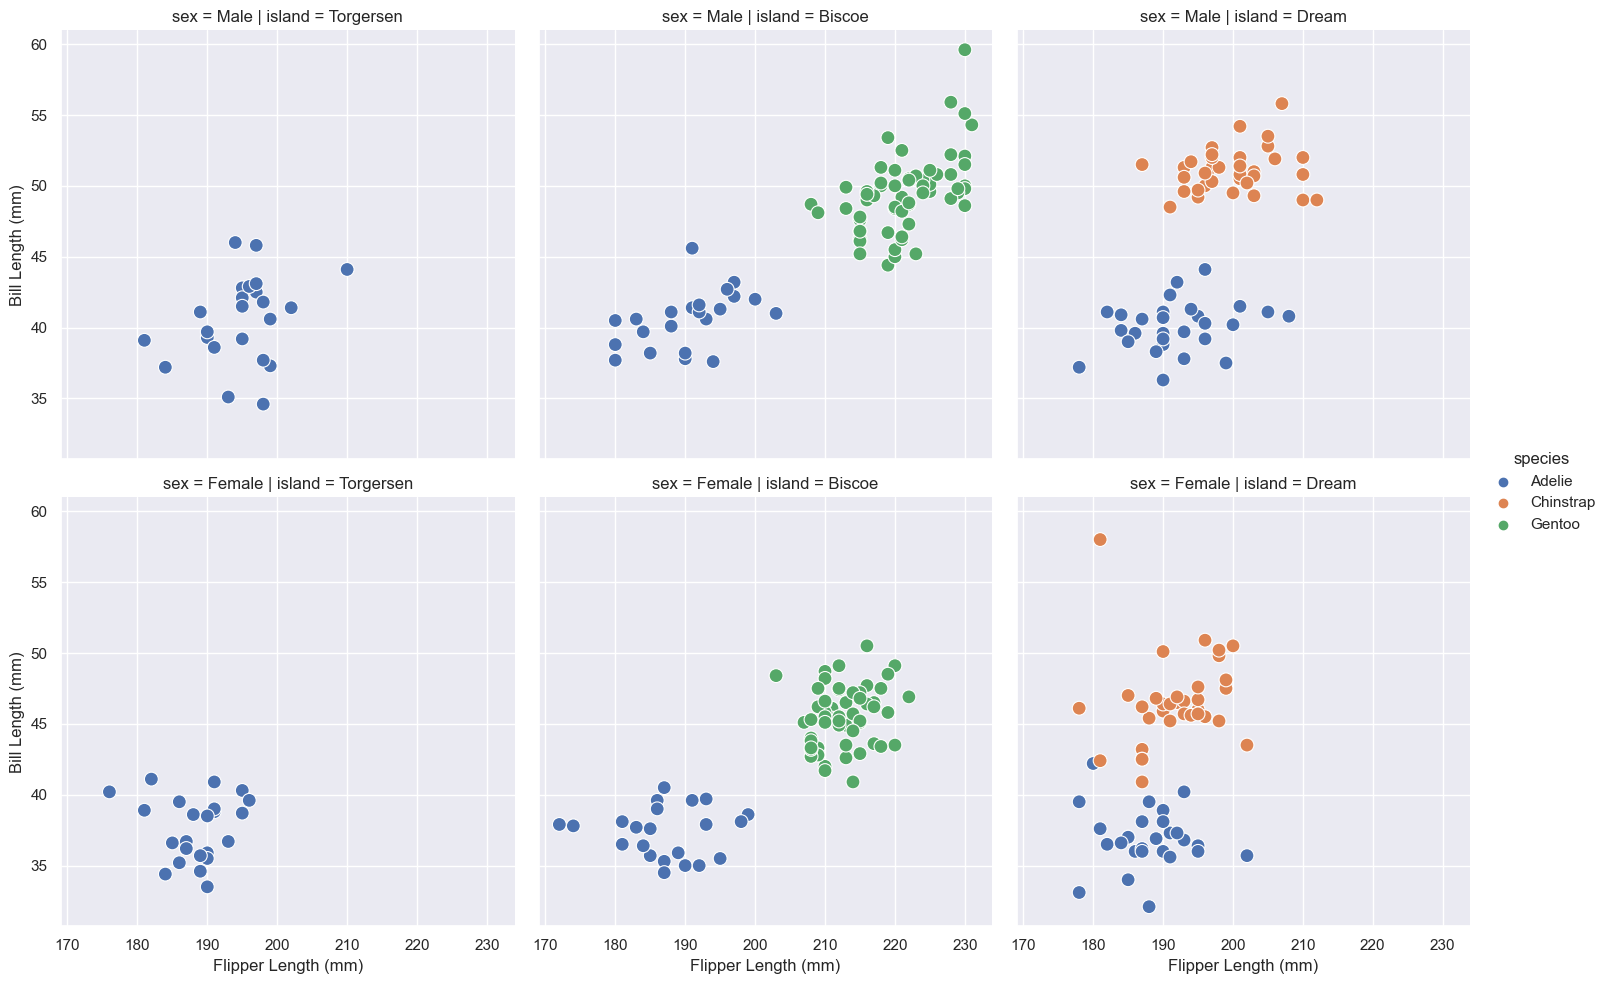

In [42]:
#Can set labels, etc., add row faceting as well
#####

s = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species",
                col="island", row="sex", s=100)

s.set_xlabels('Flipper Length (mm)')
s.set_ylabels('Bill Length (mm)')


#### Some more seaborn plotting options:

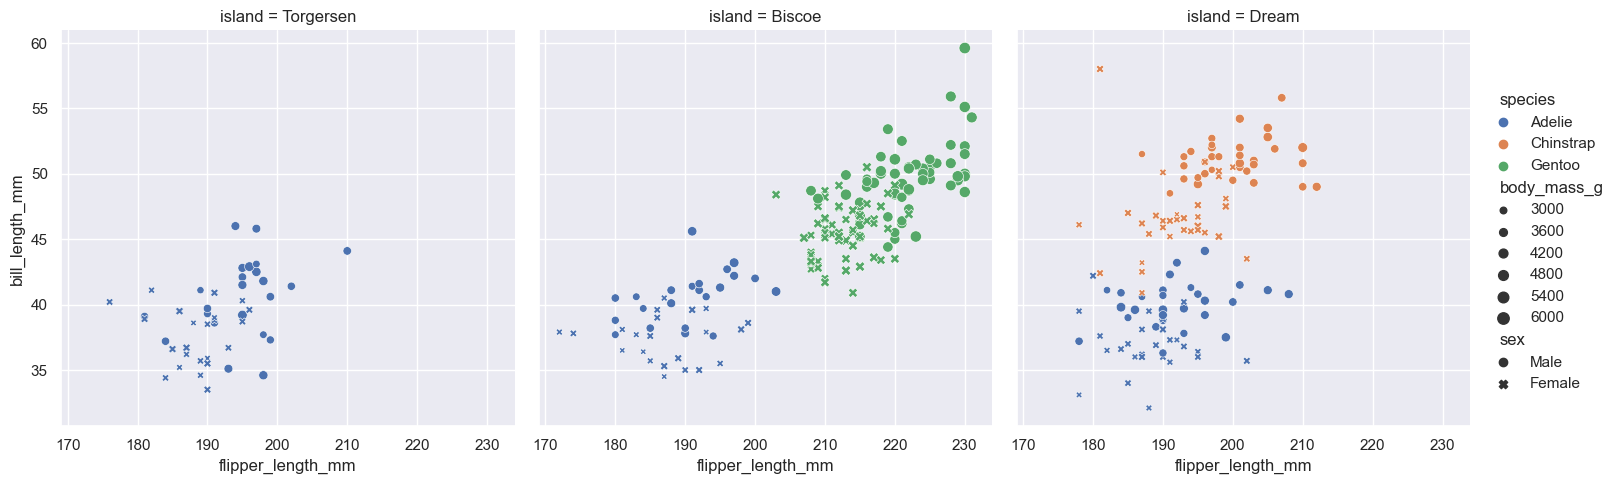

In [43]:
s = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species",
                style="sex", size="body_mass_g", col="island")

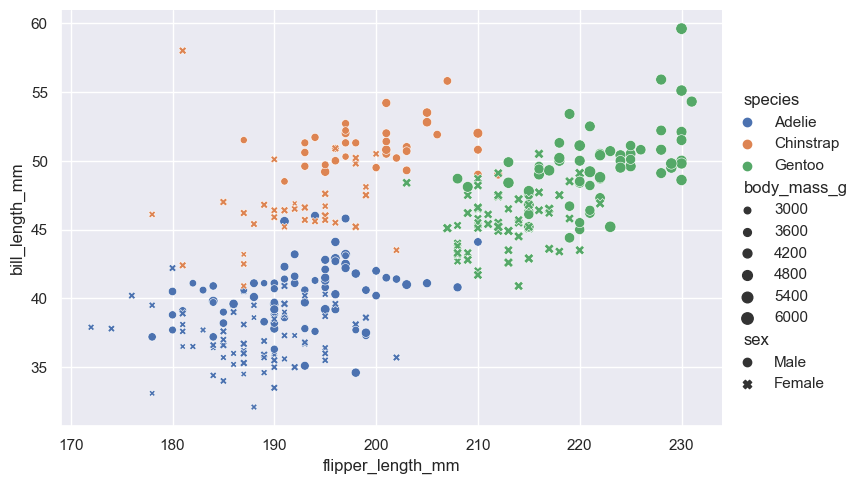

In [46]:
#To adjust plot size:

sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species",
                style="sex", size="body_mass_g", height=5, aspect=1.5)

### And now, `pairplot()` and `jointplot()`!

### First, `pairplot()`

By default, this function will create a grid of axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

The diagonal axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

Examples:

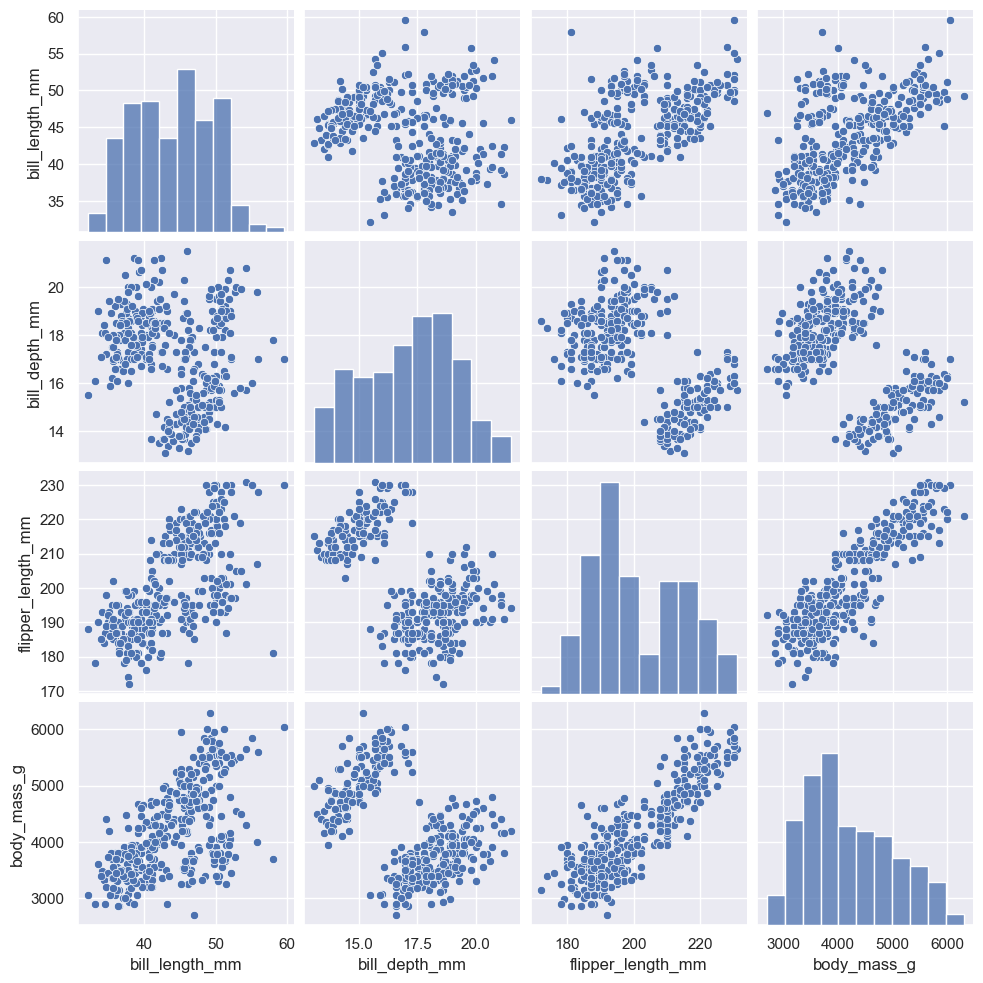

In [47]:
#The default:
sns.pairplot(data=penguins)


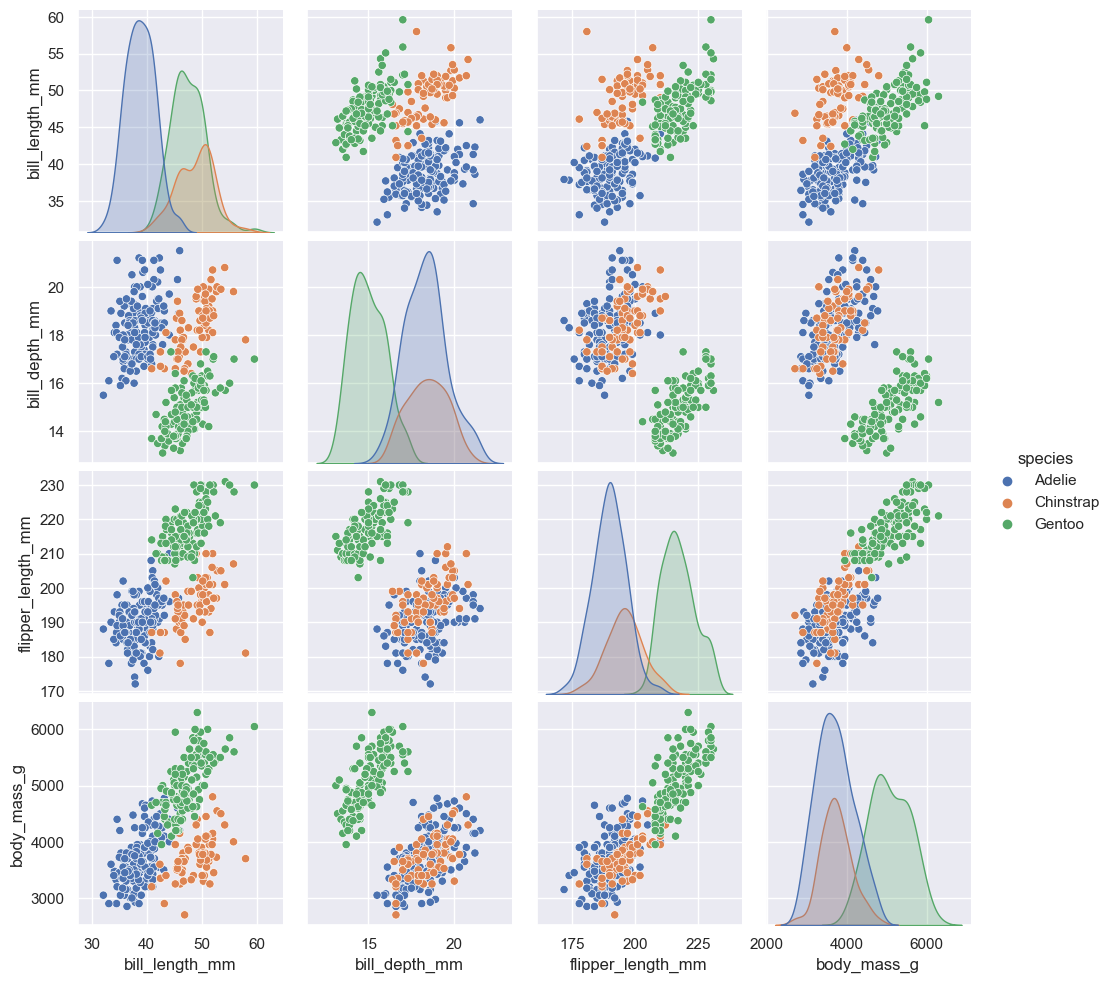

In [48]:
#Color by species, change the diag_kind:
sns.pairplot(data=penguins, hue='species', diag_kind='kde')


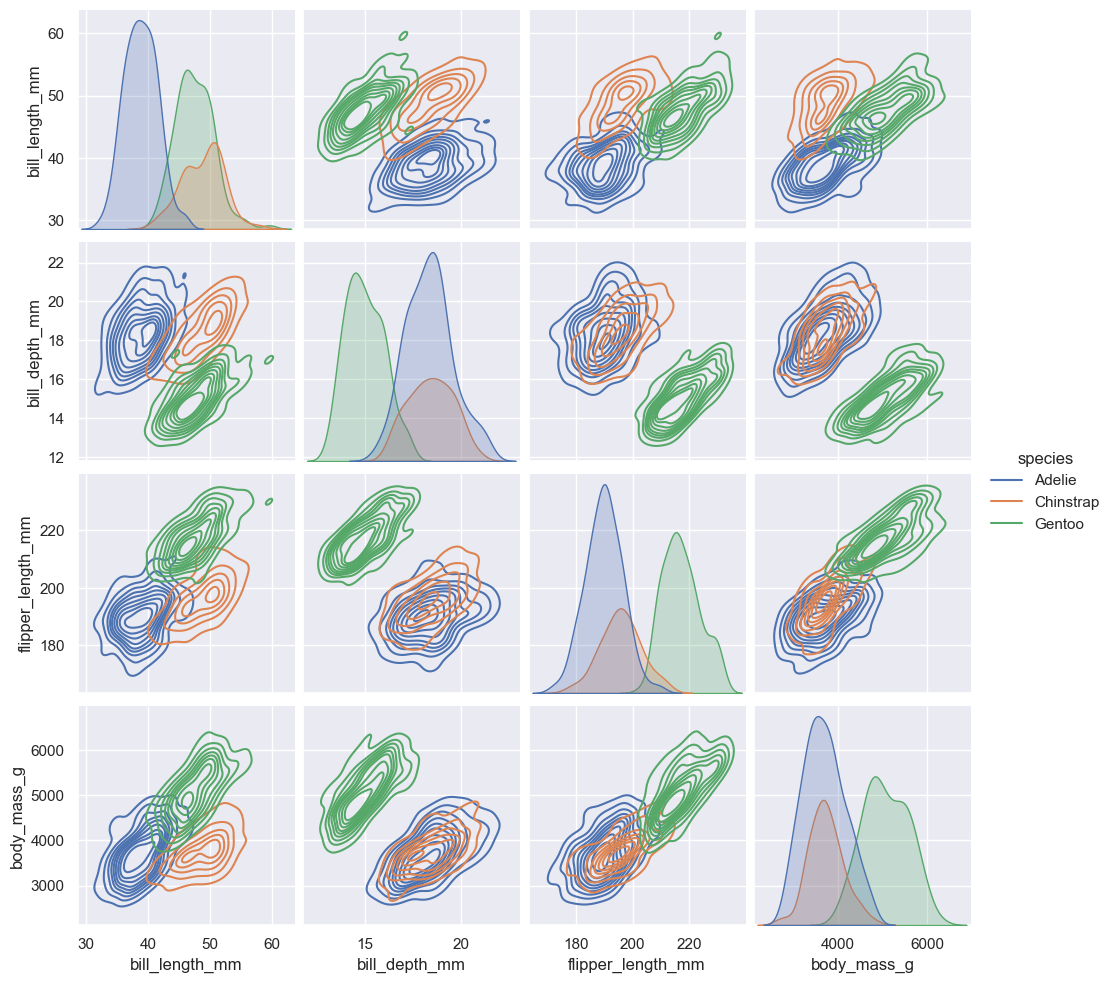

In [49]:
#Also plot kde on off-diagonals:
#Also try 'hist'

sns.pairplot(data=penguins, hue='species', kind='kde', diag_kind='kde')

### And `jointplot()`

- Plot the relationship between two variables 
- Plus marginal axes that show the univariate distribution of each separately

Example:

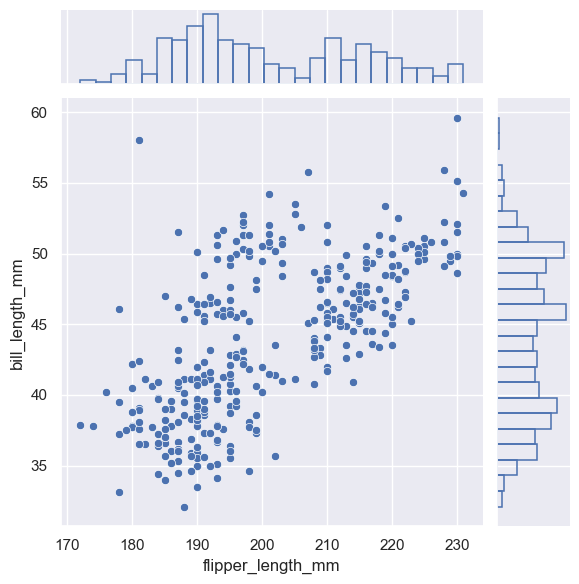

In [50]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm",
              marginal_kws = {"bins": 25, "fill": False})

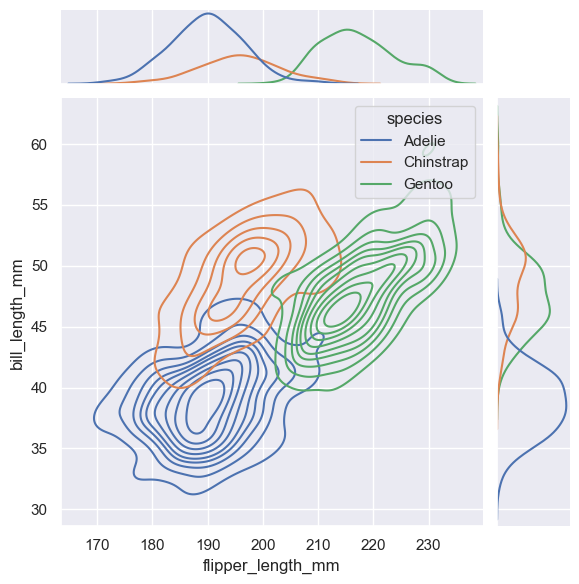

In [51]:
#And grouping by species:

sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind='kde', hue="species")

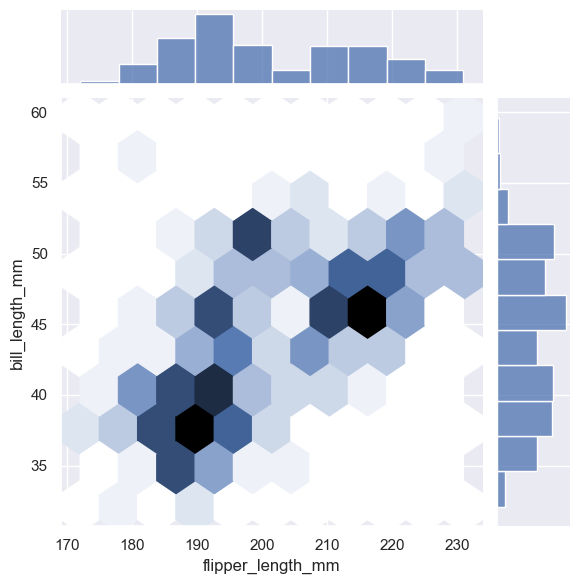

In [54]:
#Try a few different kinds:
# kde
# hist
# hex

sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind='hex')


### Categorical Plots

A bunch:

- `stripplot`
- `swarmplot`
- `boxplot`
- `violinplot`
- `pointplot`
- `barplot`

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

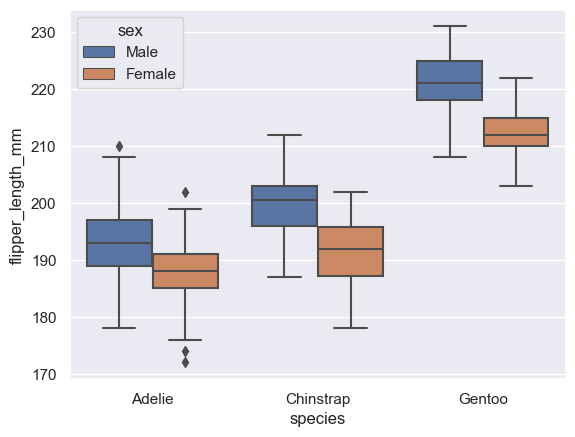

In [61]:
# Use catplot() for categorical plot in general:
#Try all the different kinds!
#Can also add col, row, for faceting
#
#Also: Try orient='h'
####

#sns.catplot(data=penguins, x='species', y='flipper_length_mm', hue='sex', kind='swarm')

#OR:
sns.boxplot(data=penguins, x='species', y='flipper_length_mm', hue='sex')

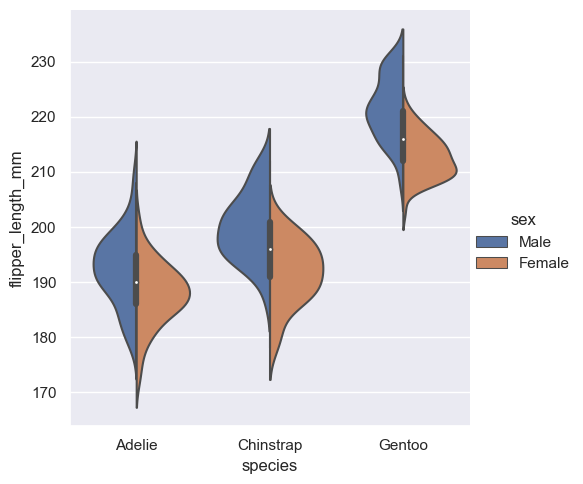

In [64]:
#Try this for the violin plot:
####

sns.catplot(data=penguins, x='species', y='flipper_length_mm', hue='sex', kind='violin', split=True)